In [15]:
import numpy as np
import math
from scipy.fftpack import fft
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

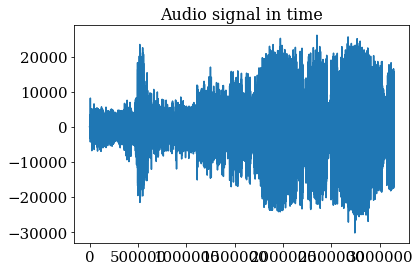

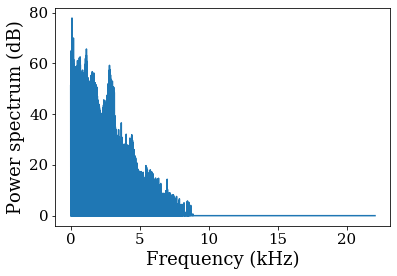

In [16]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

#INPUT
#list of samples[sample1.wav, sample2.wav, ThePiedPiper.wav] Choose one below. 
#Other files will work too, just convert them to .wav first.
AudioName = "Boeing747.wav" # Audio File
#Calibrate & Amplifier constant
C = 3.8





fs, Audiodata = wavfile.read(AudioName)
if len(Audiodata.shape) == 2:
    Audiodata = Audiodata[0:,0]
# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)
Audiodata2 = Audiodata


# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

[0.1 if x<1 else x for x in MagFreq]

FreqMagnitude = 10*np.log10(MagFreq)
FreqMagnitude = FreqMagnitude.clip(min=0)

plt.figure()
FreqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(FreqAxis/1000.0, 2*FreqMagnitude) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


In [17]:
Audiodata2.shape
AudioFreq2 = fft(Audiodata2)
AudioFreq2.shape
AudioFreq3 = AudioFreq2[0:int(np.ceil((n+1)/2.0))]
MagFreq2 = np.abs(AudioFreq3)

MagFreq2 = MagFreq2 / float(n)
MagFreq2 = MagFreq2**2
if n % 2 > 0: # ffte odd 
    MagFreq2[1:len(MagFreq2)] = MagFreq2[1:len(MagFreq2)] * 2
else:# fft even
    MagFreq2[1:len(MagFreq2) -1] = MagFreq2[1:len(MagFreq2) - 1] * 2 
    
FreqMagnitude2 = 10*np.log10(MagFreq2)
FreqMagnitude2 = FreqMagnitude2.clip(min=0)    

int(np.ceil((n+1)/2.0))*(fs/n)
fstep = (fs/n)

#one third octave band boundaries
boundary1 = round(1.12/fstep)
boundary2 = round(1.41/fstep)
boundary3 = round(1.78/fstep)
boundary4 = round(2.24/fstep)
boundary5 = round(2.82/fstep)
boundary6 = round(3.55/fstep)
boundary7 = round(4.47/fstep)
boundary8 = round(5.62/fstep)
boundary9 = round(7.08/fstep)
boundary10 = round(8.91/fstep)
boundary11 = round(11.2/fstep)
boundary12 = round(14.1/fstep)
boundary13 = round(17.8/fstep)
boundary14 = round(22.4/fstep)
boundary15 = round(28.2/fstep)
boundary16 = round(35.5/fstep)
boundary17 = round(44.7/fstep)
boundary18 = round(56.2/fstep)
boundary19 = round(70.8/fstep)
boundary20 = round(89.1/fstep)
boundary21 = round(112/fstep)
boundary22 = round(141/fstep)
boundary23 = round(178/fstep)
boundary24 = round(224/fstep)
boundary25 = round(282/fstep)
boundary26 = round(355/fstep)
boundary27 = round(447/fstep)
boundary28 = round(562/fstep)
boundary29 = round(708/fstep)
boundary30 = round(891/fstep)
boundary31 = round(1122/fstep)
boundary32 = round(1413/fstep)
boundary33 = round(1778/fstep)
boundary34 = round(2239/fstep)
boundary35 = round(2818/fstep)
boundary36 = round(3548/fstep)
boundary37 = round(4467/fstep)
boundary38 = round(5623/fstep)
boundary39 = round(7079/fstep)
boundary40 = round(8913/fstep)
boundary41 = round(11220/fstep)
boundary42 = round(14130/fstep)
boundary43 = round(17780/fstep)
boundary44 = round(22390/fstep)



In [18]:
#Integration for PBL's
band0 = FreqMagnitude2[0:boundary1]
band1 = FreqMagnitude2[boundary1:boundary2]
band2 = FreqMagnitude2[boundary2:boundary3]
band3 = FreqMagnitude2[boundary3:boundary4]
band4 = FreqMagnitude2[boundary4:boundary5]
band5 = FreqMagnitude2[boundary5:boundary6]
band6 = FreqMagnitude2[boundary6:boundary7]
band7 = FreqMagnitude2[boundary7:boundary8]
band8 = FreqMagnitude2[boundary8:boundary9]
band9 = FreqMagnitude2[boundary9:boundary10]
band10 = FreqMagnitude2[boundary10:boundary11]
band11 = FreqMagnitude2[boundary11:boundary12]
band12 = FreqMagnitude2[boundary12:boundary13]
band13 = FreqMagnitude2[boundary13:boundary14]
band14 = FreqMagnitude2[boundary14:boundary15]
band15 = FreqMagnitude2[boundary15:boundary16]
band16 = FreqMagnitude2[boundary16:boundary17]
band17 = FreqMagnitude2[boundary17:boundary18]
band18 = FreqMagnitude2[boundary18:boundary19]
band19 = FreqMagnitude2[boundary19:boundary20]
band20 = FreqMagnitude2[boundary20:boundary21]
band21 = FreqMagnitude2[boundary21:boundary22]
band22 = FreqMagnitude2[boundary22:boundary23]
band23 = FreqMagnitude2[boundary23:boundary24]
band24 = FreqMagnitude2[boundary24:boundary25]
band25 = FreqMagnitude2[boundary25:boundary26]
band26 = FreqMagnitude2[boundary26:boundary27]
band27 = FreqMagnitude2[boundary27:boundary28]
band28 = FreqMagnitude2[boundary28:boundary29]
band29 = FreqMagnitude2[boundary29:boundary30]
band30 = FreqMagnitude2[boundary30:boundary31]
band31 = FreqMagnitude2[boundary31:boundary32]
band32 = FreqMagnitude2[boundary32:boundary33]
band33 = FreqMagnitude2[boundary33:boundary34]
band34 = FreqMagnitude2[boundary34:boundary35]
band35 = FreqMagnitude2[boundary35:boundary36]
band36 = FreqMagnitude2[boundary36:boundary37]
band37 = FreqMagnitude2[boundary37:boundary38]
band38 = FreqMagnitude2[boundary38:boundary39]
band39 = FreqMagnitude2[boundary39:boundary40]
band40 = FreqMagnitude2[boundary40:boundary41]
band41 = FreqMagnitude2[boundary41:boundary42]
band42 = FreqMagnitude2[boundary42:boundary43]
band43 = FreqMagnitude2[boundary43:boundary44]




PBL0 = np.trapz(band0) 
PBL1 = np.trapz(band1)
PBL2 = np.trapz(band2)
PBL3 = np.trapz(band3)
PBL4 = np.trapz(band4)
PBL5 = np.trapz(band5)
PBL6 = np.trapz(band6)
PBL7 = np.trapz(band7)
PBL8 = np.trapz(band8)
PBL9 = np.trapz(band9)
PBL10 = np.trapz(band10)
PBL11 = np.trapz(band11)
PBL12 = np.trapz(band12)
PBL13 = np.trapz(band13)
PBL14 = np.trapz(band14)
PBL15 = np.trapz(band15)
PBL16 = np.trapz(band16)
PBL17 = np.trapz(band17)
PBL18 = np.trapz(band18)
PBL19 = np.trapz(band19)
PBL20 = np.trapz(band20)
PBL21 = np.trapz(band21)
PBL22 = np.trapz(band22)
PBL23 = np.trapz(band23)
PBL24 = np.trapz(band24)
PBL25 = np.trapz(band25)
PBL26 = np.trapz(band26)
PBL27 = np.trapz(band27)
PBL28 = np.trapz(band28)
PBL29 = np.trapz(band29)
PBL30 = np.trapz(band30)
PBL31 = np.trapz(band31)
PBL32 = np.trapz(band32)
PBL33 = np.trapz(band33)
PBL34 = np.trapz(band34)
PBL35 = np.trapz(band35)
PBL36 = np.trapz(band36)
PBL37 = np.trapz(band37)
PBL38 = np.trapz(band38)
PBL39 = np.trapz(band39)
PBL40 = np.trapz(band40)
PBL41 = np.trapz(band41)
PBL42 = np.trapz(band42)
PBL43 = np.trapz(band43)

APBL0 = C*np.trapz(band0)/len(band0)   - 120
APBL1 = C*np.trapz(band1)/len(band1)   - 120
APBL2 = C*np.trapz(band2)/len(band2)   - 120
APBL3 = C*np.trapz(band3)/len(band3)   - 120
APBL4 = C*np.trapz(band4)/len(band4)   - 120
APBL5 = C*np.trapz(band5)/len(band5)   - 120
APBL6 = C*np.trapz(band6)/len(band6)   - 100
APBL7 = C*np.trapz(band7)/len(band7)   - 100 
APBL8 = C*np.trapz(band8)/len(band8)   - 85.4
APBL9 = C*np.trapz(band9)/len(band9)   - 77.8
APBL10 = C*np.trapz(band10)/len(band10) - 70.4
APBL11 = C*np.trapz(band11)/len(band11) - 63.4
APBL12 = C*np.trapz(band12)/len(band12) - 56.7
APBL13 = C*np.trapz(band13)/len(band13) - 50.5
APBL14 = C*np.trapz(band14)/len(band14) - 44.7
APBL15 = C*np.trapz(band15)/len(band15) - 39.4
APBL16 = C*np.trapz(band16)/len(band16) - 34.6
APBL17 = C*np.trapz(band17)/len(band17) - 30.2
APBL18 = C*np.trapz(band18)/len(band18) - 26.2
APBL19 = C*np.trapz(band19)/len(band19) - 22.5
APBL20 = C*np.trapz(band20)/len(band20) - 19.1
APBL21 = C*np.trapz(band21)/len(band21) - 16.1
APBL22 = C*np.trapz(band22)/len(band22) - 13.4
APBL23 = C*np.trapz(band23)/len(band23) - 10.9
APBL24 = C*np.trapz(band24)/len(band24) - 8.6
APBL25 = C*np.trapz(band25)/len(band25) - 6.6
APBL26 = C*np.trapz(band26)/len(band26) - 4.8
APBL27 = C*np.trapz(band27)/len(band27) - 3.2
APBL28 = C*np.trapz(band28)/len(band28) - 1.9
APBL29 = C*np.trapz(band29)/len(band29) - 0.8
APBL30 = C*np.trapz(band30)/len(band30) - 0.0
APBL31 = C*np.trapz(band31)/len(band31) + 0.6
APBL32 = C*np.trapz(band32)/len(band32) + 1.0
APBL33 = C*np.trapz(band33)/len(band33) + 1.2
APBL34 = C*np.trapz(band34)/len(band34) + 1.3
APBL35 = C*np.trapz(band35)/len(band35) + 1.2
APBL36 = C*np.trapz(band36)/len(band36) + 1.0
APBL37 = C*np.trapz(band37)/len(band37) + 0.5
APBL38 = C*np.trapz(band38)/len(band38) - 0.1
APBL39 = C*np.trapz(band39)/len(band39) - 1.1
APBL40 = C*np.trapz(band40)/len(band40) - 2.5
APBL41 = C*np.trapz(band41)/len(band41) - 4.3
APBL42 = C*np.trapz(band42)/len(band42) - 6.6
APBL43 = C*np.trapz(band43)/len(band43) - 9.3

PBLVector = []
APBLVector = []

for i in range(44):
    a = eval('PBL' +str(i))
    b = len(eval('band' +str(i)))
    PBLVector.append(C*(a/b))

for i in range(44):
    a = eval('APBL' +str(i))
    APBLVector.append(a)    
        
for i in range(len(APBLVector)):
    if APBLVector[i] < 0.:
        APBLVector[i] = 0.

for i in range(len(APBLVector)):
    if math.isnan(APBLVector[i]):
        APBLVector[i] = 0.


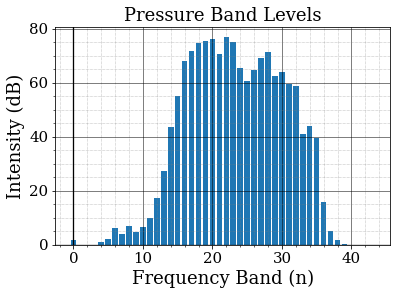

In [19]:
#Plot PBL's

texpsize = [15, 18, 22]

plt.rc('font', size=texpsize[1], family='serif')  # controls default text sizes
plt.rc('axes', titlesize=texpsize[1])  # fontsize of the axes title
plt.rc('axes', labelsize=texpsize[1])  # fontsize of the x and y labels
plt.rc('xtick', labelsize=texpsize[0])  # fontsize of the tick labels
plt.rc('ytick', labelsize=texpsize[0])  # fontsize of the tick labels
plt.rc('legend', fontsize=texpsize[0])  # legend fontsize
plt.rc('figure', titlesize=texpsize[2])  # fontsize of the figure title
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams["legend.fancybox"] = False


#Normal PBL
plt.bar(range(len(PBLVector)),PBLVector)
plt.xlabel('Frequency Band (n)')
plt.ylabel('Intensity (dB)')
plt.title('Pressure Band Levels')
plt.axvline(0,color=(0,0,0),linewidth=1.3)
plt.axhline(0,color=(0,0,0),linewidth=1.3)
plt.minorticks_on() # set minor ticks
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey') # customise minor grid

plt.show()

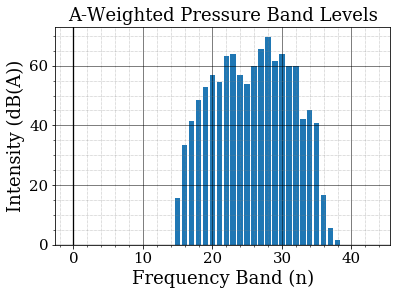

In [20]:
#A-Weighted PBL

plt.bar(range(len(APBLVector)),APBLVector)
plt.xlabel('Frequency Band (n)')
plt.ylabel('Intensity (dB(A))')
plt.title('A-Weighted Pressure Band Levels')
plt.axvline(0,color=(0,0,0),linewidth=1.3)
plt.axhline(0,color=(0,0,0),linewidth=1.3)
plt.minorticks_on() # set minor ticks
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey') # customise minor grid

plt.show()

In [21]:
#overal dB summation

#L_Normal
sum1 = []
for i in range(len(PBLVector)):
    a = 10**(PBLVector[i]/10)
    sum1.append(a)
L_Normal = 10*np.log10(sum(sum1))

#L_A
sum2 = []
for i in range(len(APBLVector)):
    a = 10**(APBLVector[i]/10)
    sum2.append(a)
L_A = 10*np.log10(sum(sum2))

L_Normal,L_A

(83.98045670064442, 74.17238973189464)

G:\Program files\Anaconda\envs\Python36TT\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


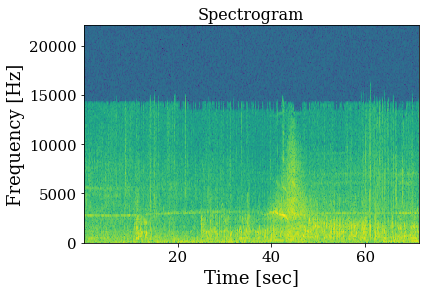

In [22]:
#Spectrogram ##PSD over time!
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram',size=16);

plt.show()    
    

In [23]:
APBLVector

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 15.49407039219092,
 33.30828140444755,
 41.4807516398898,
 48.569719415526635,
 52.814610452116455,
 56.89466674426182,
 54.51085919028612,
 63.29797901356546,
 64.08364868280736,
 56.926737070778536,
 54.04009787302897,
 59.93894619696162,
 65.75070132330679,
 69.51119006825873,
 61.600470466936166,
 63.962140011941884,
 60.01457347653858,
 59.821869258276536,
 42.04750344049951,
 45.28372004612259,
 40.6603991286856,
 16.72796677938713,
 5.565523049057348,
 1.4425000092597557,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [24]:
L_A

74.17238973189464

In [25]:
writetotxt = APBLVector
writetotxt.append(L_A)

In [26]:
np.savetxt('Output.txt', writetotxt, delimiter=',')
